## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [1]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv
import numpy as np

project_home = '/home/camachocm2/Analysis/aggregate_anats/'
data_file = project_home + 'practice_qs/AB_alldata.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,19:34]
cbq_data.describe()

,ActivityLevel,AngerFrustration,ApproachPositiveAnticipation,AttentionalFocusing,Discomfort,FallingReactivitySoothability,Fear,HighIntensityPleasure,Impulsivity,InhibitoryControl,LowIntensityPleasure,PerceptualSensitivity,Sadness,Shyness,SmilingandLaughter
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,4.600000,4.397667,5.095286,4.585667,4.126190,4.411857,3.769038,4.423857,4.345238,4.607143,5.362500,5.202381,4.226565,3.721476,5.219096
std,1.078301,1.649234,0.948666,1.344726,1.137997,1.203140,1.458030,1.319931,1.012531,1.135021,1.110341,0.997942,1.091359,1.199327,0.816821
min,2.285714,1.000000,3.166667,1.000000,1.666667,1.333333,0.833333,1.833333,2.000000,2.166667,2.375000,2.833333,1.428571,1.000000,2.666670
25%,3.857143,3.041667,4.500000,3.833333,3.333333,3.541667,2.833333,3.541667,3.666667,3.666667,4.875000,4.541667,3.714286,2.875000,4.541667
50%,4.500000,4.500000,5.000000,4.666667,4.000000,4.666667,3.666500,4.500000,4.333333,4.666667,5.625000,5.333333,4.142857,3.750000,5.333330
75%,5.392857,6.000000,5.833333,5.791667,4.791667,5.333333,4.791667,5.625000,5.000000,5.333333,6.125000,5.833333,4.964286,4.625000,5.833330
max,6.714286,7.000000,7.000000,7.000000,7.000000,6.333333,7.000000,6.833333,6.666667,7.000000,7.000000,7.000000,6.571429,6.333333,7.000000


In [2]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.head()

,ActivityLevel_std,AngerFrustration_std,ApproachPositiveAnticipation_std,AttentionalFocusing_std,Discomfort_std,FallingReactivitySoothability_std,Fear_std,HighIntensityPleasure_std,Impulsivity_std,InhibitoryControl_std,LowIntensityPleasure_std,PerceptualSensitivity_std,Sadness_std,Shyness_std,SmilingandLaughter_std
0,-2.16173,-1.464303,-0.455074,0.310342,1.068420,0.771423,2.231977,-1.468067,-1.172390,1.975526,1.485420,1.141467,0.581963,1.213702,0.551903
1,-2.16173,-2.075024,-1.516797,1.309029,-2.176878,1.469056,-1.797741,0.058104,-0.509220,2.123426,0.124730,1.477900,-1.923064,0.093940,0.140862
2,-2.02829,-0.446436,-2.047658,0.060670,-0.701743,0.492370,-0.531258,-1.468067,-1.006598,-0.982481,-1.349351,-2.222858,0.450120,0.373880,0.140862
3,-1.89485,1.182151,-0.808982,-0.064166,-1.144283,-1.181950,-0.876663,-1.595249,-0.343427,-0.538780,0.124730,-0.540695,-0.736473,2.193493,0.346383
4,-1.62797,-1.464303,-1.162889,1.683537,-1.144283,0.631896,0.850359,-1.340887,-0.840805,-0.095079,0.351512,-2.391074,-1.132003,-0.046030,-0.270166


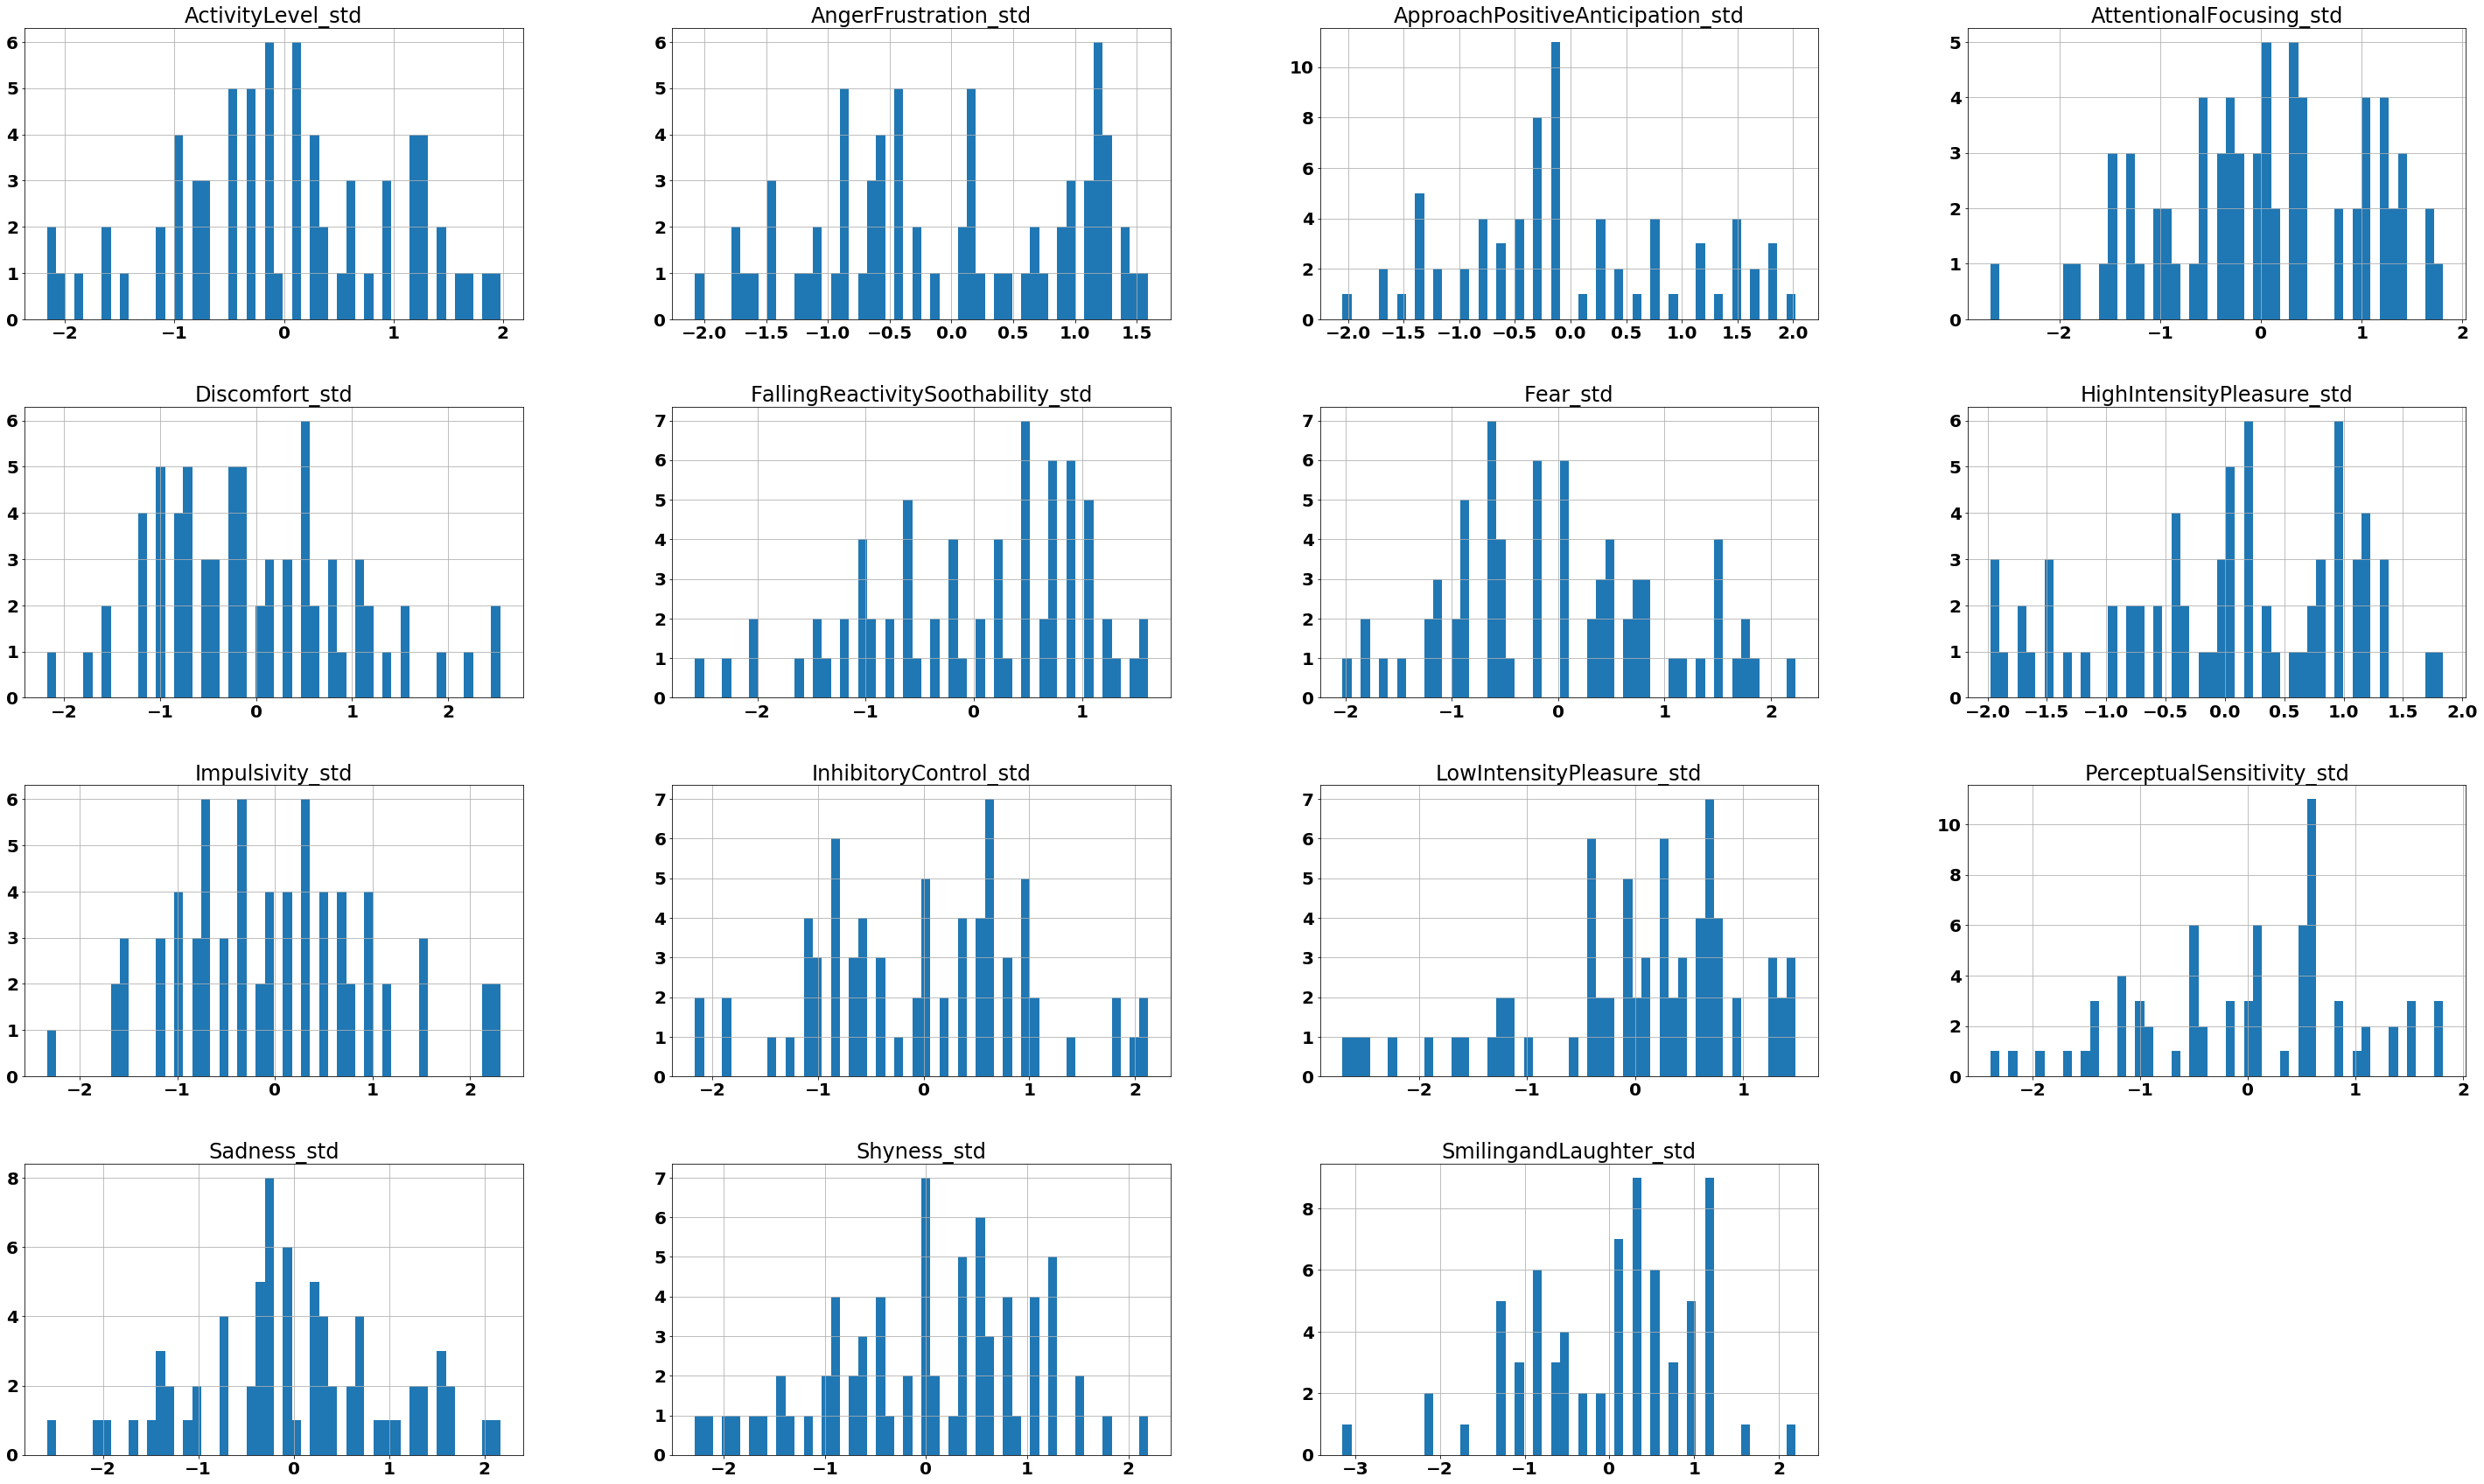

In [4]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
std_cbq_data.hist(bins=50, figsize=(50,30))
plt.show()

silhouette average for 3 clusters:0.12643291533923232
[-0.56352993  0.58372087  0.25274048] [-0.7747806   0.81934747  0.32332543]


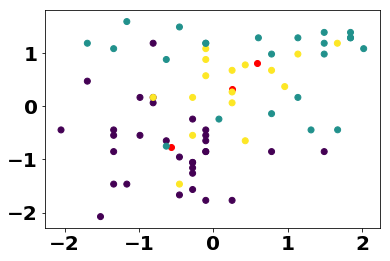

In [7]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique
import matplotlib.cm as cm

#for n in [2,3,4,5,6]:
for n in [3]:
    kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(std_cbq)
    silhouette_avg = silhouette_score(std_cbq, kmeans.fit_predict(std_cbq))
    print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))

    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers[:,2],cluster_centers[:,1])
    plt.scatter(cluster_centers[:,2],cluster_centers[:,1], c='red')
    plt.scatter(std_cbq[:,2],std_cbq[:,1], c=kmeans.labels_)
    plt.show()

In [6]:
groups = kmeans.labels_
std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_cbq_data)
#all_data.to_csv(project_home + 'practice_qs/kmeans_group_data.csv')

group_names, group_ns = unique(groups, return_counts=True)
print(group_ns)

std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
#std_cbq_data_m.to_csv(project_home + 'practice_qs/kmeans_group_summary_data.csv')
print(std_cbq_data.columns)

[31 23 16]
Index(['ActivityLevel_std', 'AngerFrustration_std',
       'ApproachPositiveAnticipation_std', 'AttentionalFocusing_std',
       'Discomfort_std', 'FallingReactivitySoothability_std', 'Fear_std',
       'HighIntensityPleasure_std', 'Impulsivity_std', 'InhibitoryControl_std',
       'LowIntensityPleasure_std', 'PerceptualSensitivity_std', 'Sadness_std',
       'Shyness_std', 'SmilingandLaughter_std', 'kmgroup'],
      dtype='object')


<Figure size 2880x720 with 0 Axes>

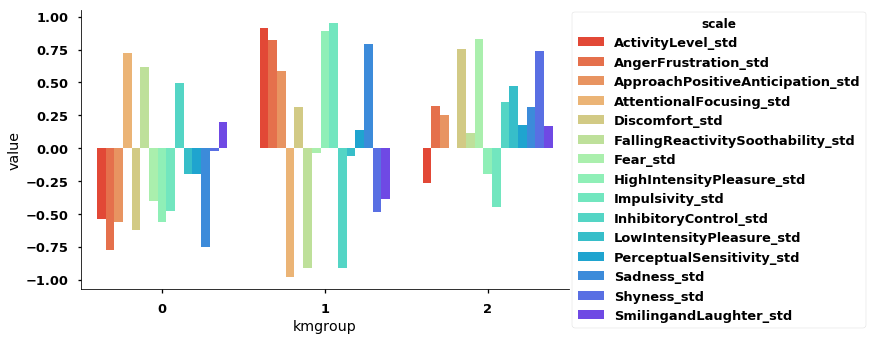

In [10]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
sns.set_context("talk")

long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                    value_vars=['ActivityLevel_std', 'AngerFrustration_std',
                                'ApproachPositiveAnticipation_std', 'AttentionalFocusing_std',
                                'Discomfort_std', 'FallingReactivitySoothability_std', 'Fear_std',
                                'HighIntensityPleasure_std', 'Impulsivity_std', 
                                'InhibitoryControl_std','LowIntensityPleasure_std', 
                                'PerceptualSensitivity_std','Sadness_std',
                                'Shyness_std', 'SmilingandLaughter_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))
#sns.boxplot(x='kmgroup',y='value',hue='scale',data=long_std_cbq)
#plt.xticks(rotation=90)
#plt.savefig(project_home + 'practice_qs/2groups.png',transparent=True,bbox_inches='tight',pad_inches=2)
#plt.show()
sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
               kind='bar',size=5,palette='rainbow_r',legend=True, aspect=1.75, ci=None)
plt.savefig(project_home + 'practice_qs/groups_plots.png',transparent=True)


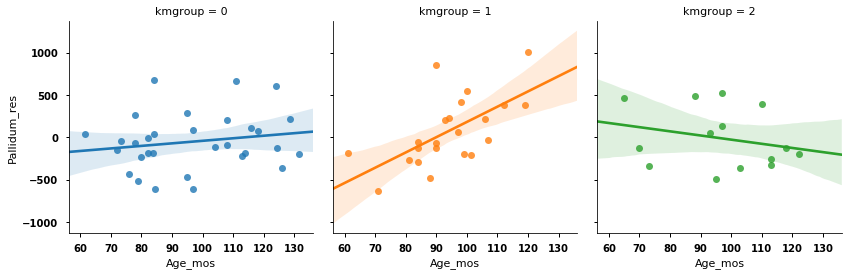

In [7]:
import seaborn as sns

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

# Visualize results
full_data = read_csv(project_home + 'practice_qs/kmeans_group_data_n70.csv')
full_data.describe()

#plt.scatter(full_data['Age_mos'],full_data['Pallidum_res'], c=full_data['kmgroup'])
sns.lmplot(x='Age_mos',y='Pallidum_res', col='kmgroup', hue='kmgroup', data=full_data, 
           ci=95, size=4)
#plt.savefig(project_home + 'practice_qs/pallidum_age.png',transparent=True)
plt.show()

In [14]:
from pandas import read_csv, DataFrame, Series

subject_info = read_csv('/home/camachocm2/Analysis/aggregate_anats/misc/subject_info_usable.csv')
subject_info.describe()

,SubjectID,Sequence Version,in_analysis,Same Kid as:,Age_yrs,Age_mos,male
count,124.000000,124.000000,124.0,4.000000,124.000000,124.000000,124.000000
mean,972.758065,1.701613,1.0,1060.000000,8.174556,99.795968,0.508065
std,749.967711,0.796127,0.0,1087.234105,1.865674,23.367170,0.501963
min,101.000000,1.000000,1.0,102.000000,4.000000,55.000000,0.000000
25%,213.750000,1.000000,1.0,126.750000,6.833333,82.000000,0.000000
50%,1008.500000,1.000000,1.0,1068.000000,8.041667,97.000000,1.000000
75%,2005.250000,2.000000,1.0,2001.250000,9.437500,116.250000,1.000000
max,2038.000000,3.000000,1.0,2002.000000,12.000000,154.000000,1.000000


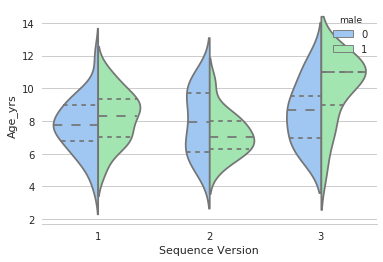

In [18]:
import seaborn as sns
sns.set(style="whitegrid",  palette="pastel", color_codes=True)
sns.violinplot(x="Sequence Version", y="Age_yrs", hue="male", data=subject_info, split=True,
               inner="quart")
sns.despine(left=True)

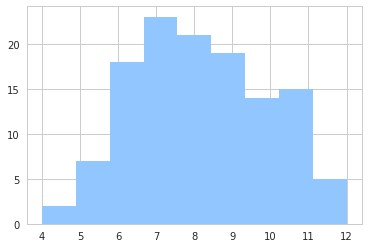

In [16]:
import matplotlib.pyplot as plt

plt.hist('Age_yrs', data=subject_info, bins=9)
plt.show()